A large MNC company have 9 broad verticals across the organisation. One of the problem they are currently is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1. They first identify a set of employees based on recommendations/ past performance
2. Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, this company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

To solve this problem i will use predictive analytics in identifying the employees most likely to get promoted.

In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('train_LZdllcl.csv')

In [6]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [9]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [10]:
df['education'].isna().sum()

2409

In [11]:
df['education']=df['education'].fillna("Bachelor's",axis=0)

In [12]:
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].median(),axis=0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [14]:
#EDA

In [15]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


<AxesSubplot:>

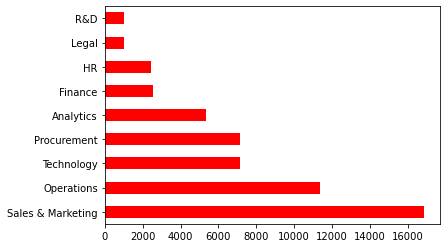

In [16]:
df['department'].value_counts().plot(kind='barh',color='red')

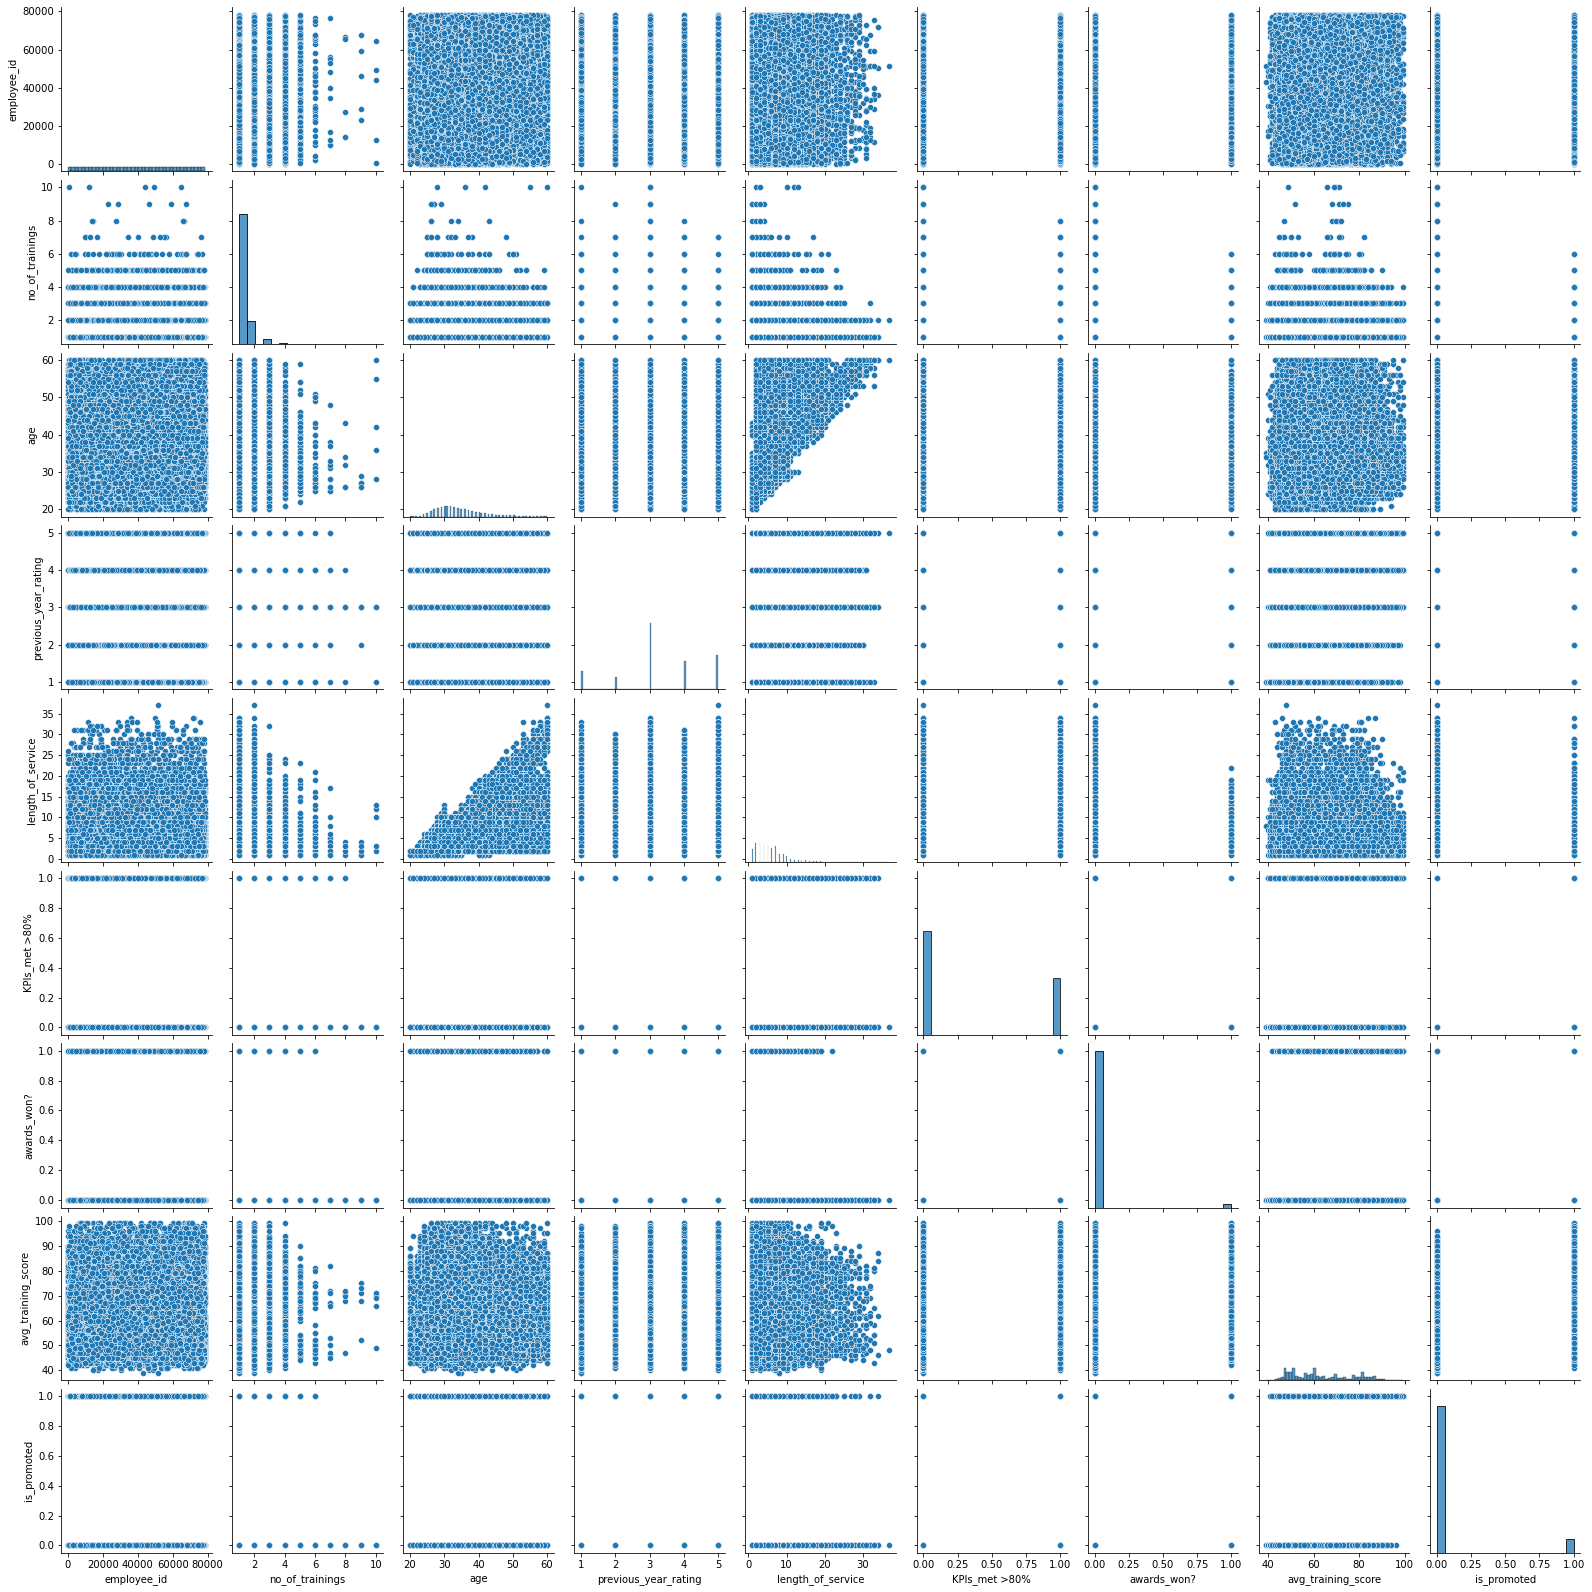

In [17]:
sns.pairplot(df)

In [18]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


<AxesSubplot:xlabel='age', ylabel='length_of_service'>

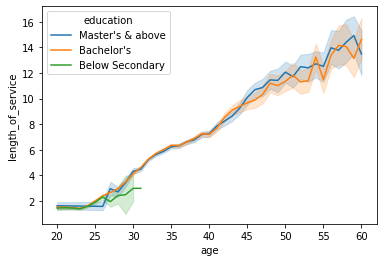

In [19]:
sns.lineplot(x='age',y='length_of_service',data=df,hue='education')

<AxesSubplot:xlabel='gender', ylabel='count'>

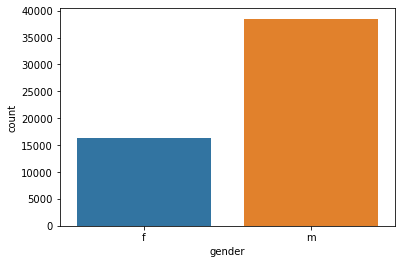

In [20]:
sns.countplot(x='gender',data=df)
#male employees are almost twice the female

In [21]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


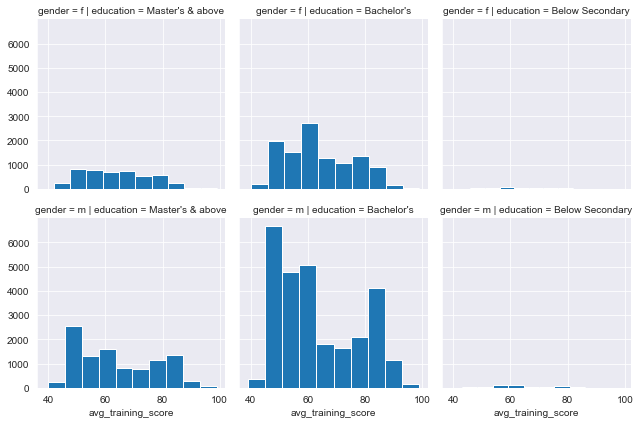

In [22]:
sns.set_style('darkgrid')
g= sns.FacetGrid(df, col="education",  row="gender")
g = g.map(plt.hist, "avg_training_score")

In [23]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
#MODEL

In [24]:
education=pd.get_dummies(df['education'],drop_first=True)

In [25]:
gender=pd.get_dummies(df['gender'],drop_first=True)

In [26]:
df=pd.concat([df,education,gender],axis=1)

In [27]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Below Secondary,Master's & above,m
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0,1,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0,0,1
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0,0,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0,0,1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0,0,1


In [28]:
df['Below Secondary'].value_counts()

0    54003
1      805
Name: Below Secondary, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'Below Secondary',
       'Master's & above', 'm'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
 14  Below Secondary       54808 non-null  uint8  
 15  Master's & above   

In [32]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [33]:
X=df[['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?',
     'avg_training_score', 'Below Secondary',"Master's & above", 'm']]
y=df['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [36]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [37]:
predictions=log_model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16613
           1       0.58      0.07      0.12      1474

    accuracy                           0.92     18087
   macro avg       0.75      0.53      0.54     18087
weighted avg       0.90      0.92      0.89     18087



In [40]:
#balancing the target variables

In [41]:
from sklearn.utils import resample

In [42]:
# Separate majority and minority classes
df_majority = df[df['is_promoted']==0]
df_minority = df[df['is_promoted']==1]

In [43]:
# Upsample minority class

In [44]:
# Upsample minority class
# sample with replacement to match majority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=50140,random_state=123)

In [45]:
df_minority.count()

employee_id             4668
department              4668
region                  4668
education               4668
gender                  4668
recruitment_channel     4668
no_of_trainings         4668
age                     4668
previous_year_rating    4668
length_of_service       4668
KPIs_met >80%           4668
awards_won?             4668
avg_training_score      4668
is_promoted             4668
Below Secondary         4668
Master's & above        4668
m                       4668
dtype: int64

In [46]:
df_minority_upsampled.count()

employee_id             50140
department              50140
region                  50140
education               50140
gender                  50140
recruitment_channel     50140
no_of_trainings         50140
age                     50140
previous_year_rating    50140
length_of_service       50140
KPIs_met >80%           50140
awards_won?             50140
avg_training_score      50140
is_promoted             50140
Below Secondary         50140
Master's & above        50140
m                       50140
dtype: int64

In [47]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority,df_minority_upsampled])


In [48]:
df_upsampled['is_promoted'].value_counts()

0    50140
1    50140
Name: is_promoted, dtype: int64

In [49]:
#using decision trees

In [50]:
X=df_upsampled[['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?',
     'avg_training_score', 'Below Secondary',"Master's & above", 'm']]
y=df_upsampled['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtree= DecisionTreeClassifier()

In [53]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
predictions = dtree.predict(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(confusion_matrix(y_test,predictions))
print('--'*50)
print(classification_report(y_test,predictions))

[[13449  1602]
 [   15 15018]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     15051
           1       0.90      1.00      0.95     15033

    accuracy                           0.95     30084
   macro avg       0.95      0.95      0.95     30084
weighted avg       0.95      0.95      0.95     30084

